In [2]:
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
%matplotlib inline

In [10]:

print(images)

['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']


In [71]:
# number of inside coners in any given row
nx =9 
# number of inside conrners in any given column
ny = 6
#object points array
objpoints =[]
# image points array
imgpoints = []

#  generate object points
objp = np.zeros((ny*nx,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)





'https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_calib3d/py_calibration/py_calibration.html'




C:\Users\gvvam\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 720x720 with 0 Axes>

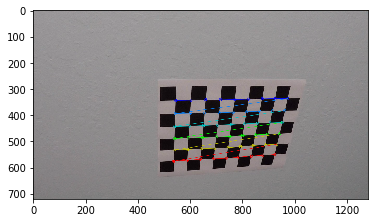

<Figure size 720x720 with 0 Axes>

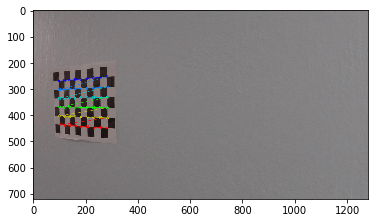

<Figure size 720x720 with 0 Axes>

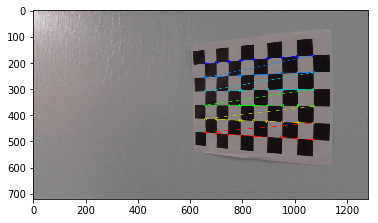

<Figure size 720x720 with 0 Axes>

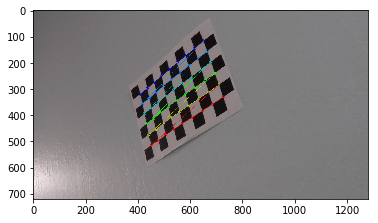

<Figure size 720x720 with 0 Axes>

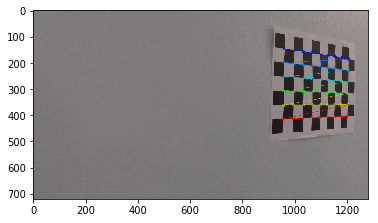

<Figure size 720x720 with 0 Axes>

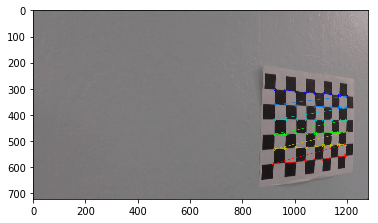

<Figure size 720x720 with 0 Axes>

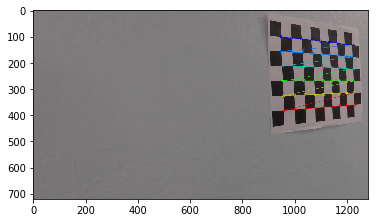

<Figure size 720x720 with 0 Axes>

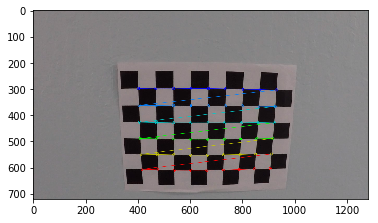

<Figure size 720x720 with 0 Axes>

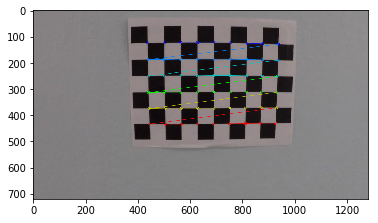

<Figure size 720x720 with 0 Axes>

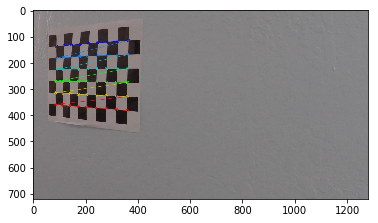

<Figure size 720x720 with 0 Axes>

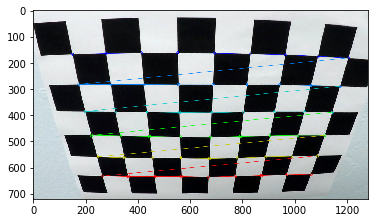

<Figure size 720x720 with 0 Axes>

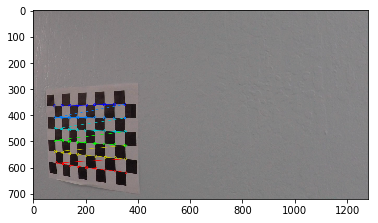

<Figure size 720x720 with 0 Axes>

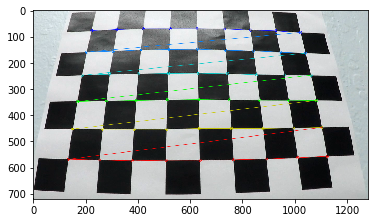

<Figure size 720x720 with 0 Axes>

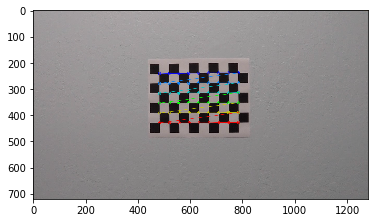

<Figure size 720x720 with 0 Axes>

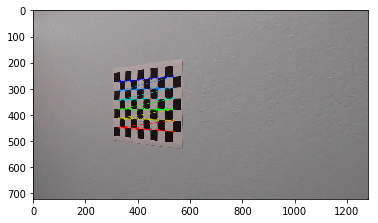

<Figure size 720x720 with 0 Axes>

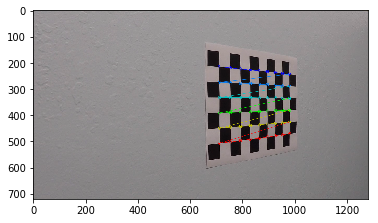

<Figure size 720x720 with 0 Axes>

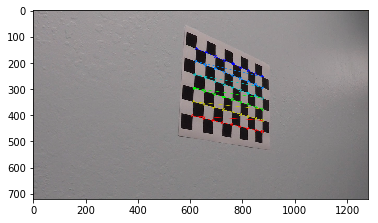

In [74]:

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
images = glob.glob('camera_cal/calibration*.jpg')
for idx,fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1],img.shape[0])
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    
    if ret == True:
        objpoints.append(objp)
#         cv2.cornerSubPix(gray,corners,(nx,ny),(-1,-1),criteria)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
        plt.figure(figsize=(10,10))
        fig = plt.figure()
        plt.imshow(img)

        








# computing the camera calibration matrix and distrortion coeefients of chessboard

In [82]:
import pickle
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
cal_pickle = {}
cal_pickle["mtx"] = mtx
cal_pickle["dist"] = dist
pickle.dump( cal_pickle, open( "calibration_pickle.p", "wb" ) )

# Apply distortion correction to each image

C:\Users\gvvam\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 720x720 with 0 Axes>

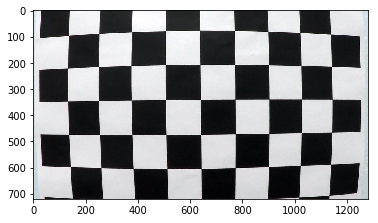

<Figure size 720x720 with 0 Axes>

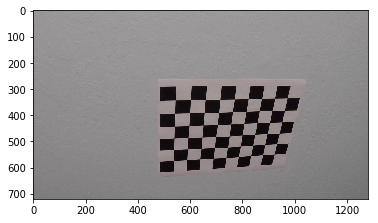

<Figure size 720x720 with 0 Axes>

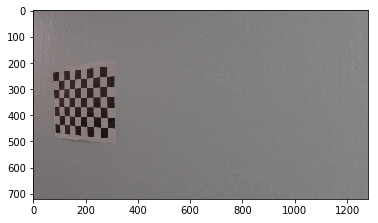

<Figure size 720x720 with 0 Axes>

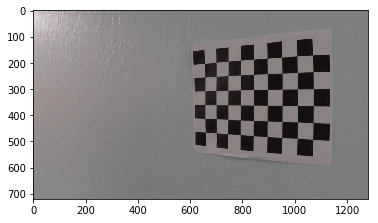

<Figure size 720x720 with 0 Axes>

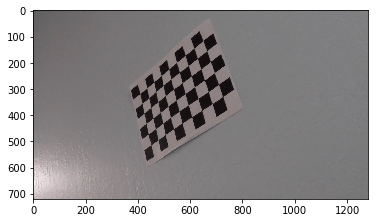

<Figure size 720x720 with 0 Axes>

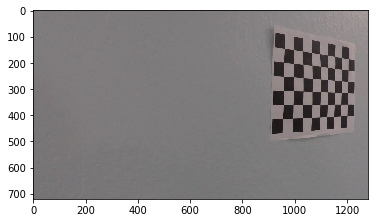

<Figure size 720x720 with 0 Axes>

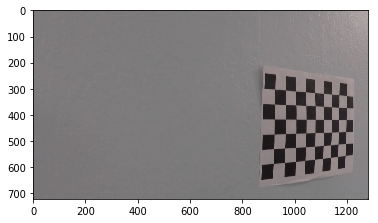

<Figure size 720x720 with 0 Axes>

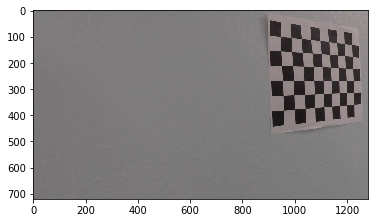

<Figure size 720x720 with 0 Axes>

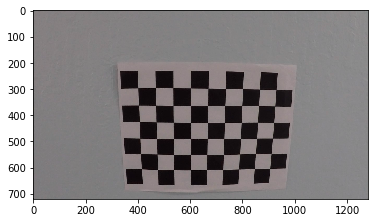

<Figure size 720x720 with 0 Axes>

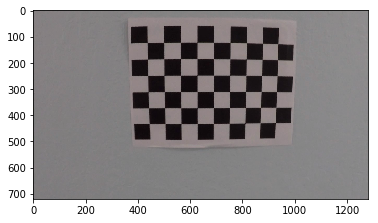

<Figure size 720x720 with 0 Axes>

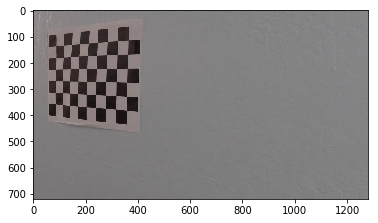

<Figure size 720x720 with 0 Axes>

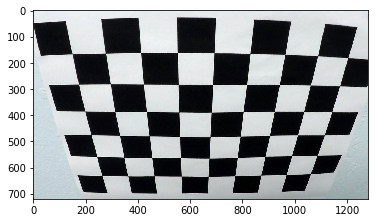

<Figure size 720x720 with 0 Axes>

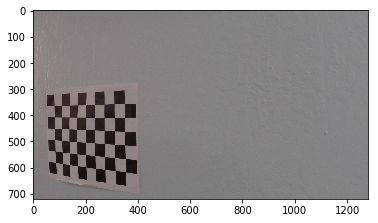

<Figure size 720x720 with 0 Axes>

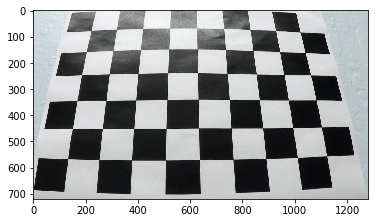

<Figure size 720x720 with 0 Axes>

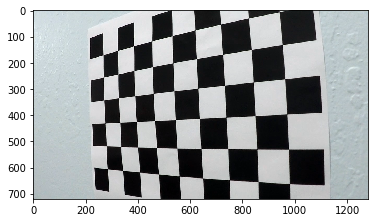

<Figure size 720x720 with 0 Axes>

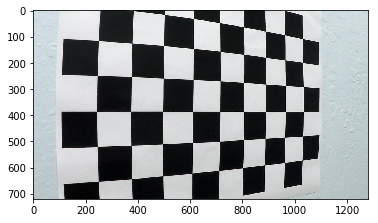

<Figure size 720x720 with 0 Axes>

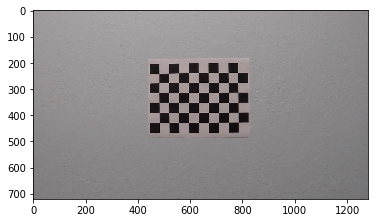

<Figure size 720x720 with 0 Axes>

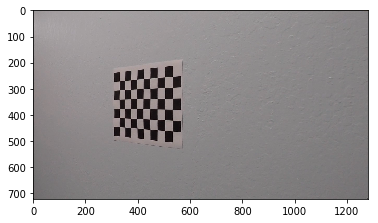

<Figure size 720x720 with 0 Axes>

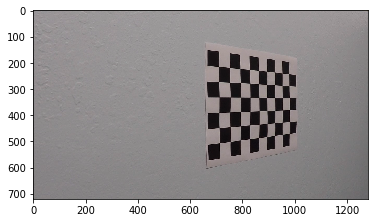

<Figure size 720x720 with 0 Axes>

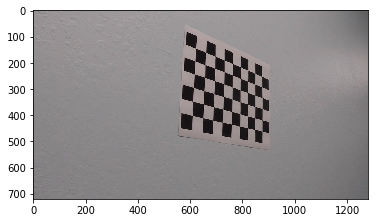

In [80]:
for idx,fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
#      Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


    dst = cv2.undistort(img, mtx, dist, None, mtx)
    plt.figure(figsize=(10,10))
    fig = plt.figure()
    plt.imshow(img)

In [81]:
def undistort_image(image):
    img_size = (img.shape[1], img.shape[0])
    with open("camera_calibration_result.p", mode='rb') as f:
        camera_calib = pickle.load(f)
        mtx = camera_calib["mtx"]
        dist = camera_calib["dist"]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    image = cv2.undistort(raw, mtx, dist, None, mtx)
    ax1.imshow(raw)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(image)
    ax2.set_title('Undistorted Image', fontsize=30)